In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from pathlib import Path

parent = Path(os.path.abspath("")).resolve().parents[0]
if parent not in sys.path:
    sys.path.insert(0, str(parent))

from utils.metrics import get_classification_metrics, get_probability_measures, get_lift_demotion_scores

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
%matplotlib inline

In [10]:
thefts = pd.read_csv("../dataset/final/valid_train_thefts.csv")
non_thefts = pd.read_csv("../dataset/final/valid_train_non_theft_suc_theft_acct.csv")
non_thefts2 = pd.read_csv("../dataset/final/non_thefts_k_100000.csv")

df = pd.concat([thefts, non_thefts, non_thefts2])
#df.drop(columns=['acct', 'successor', 'voltage'], inplace=True)
df.fillna(-1, inplace=True)

In [11]:
df.head()

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,voltage,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,100040,1,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,...,144.181818,122.0,152,LOW,0,1,12.0,0,0,1
1,100915,1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,...,122.416667,121.0,341,LOW,0,1,12.0,0,1,1
2,101153,1,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,...,122.250000,122.0,1251,LOW,2,1,25.0,0,3,1
3,101214,1,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,...,197.200000,182.0,190,LOW,2,6,25.0,0,0,1
4,102718,1,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,...,139.142857,121.0,821,LOW,3,1,35.0,0,5,1


In [12]:
df.columns

Index(['acct', 'successor', 'number_of_measurements', 'number_of_zeros',
       'max_energy_per_day', 'min_energy_per_day', 'mean_energy_per_day',
       'median_energy_per_day', 'std_energy_per_day',
       'max_measurement_interval_in_days', 'min_measurement_interval_in_days',
       'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'voltage', 'parno', 'xrhsh', 'contract_capacity', 'acct_control',
       'number_of_requests', 'target'],
      dtype='object')

In [13]:
duplicate_rows = df[df.duplicated(
    subset=['number_of_measurements', 'number_of_zeros',
       'max_energy_per_day', 'min_energy_per_day', 'mean_energy_per_day',
       'median_energy_per_day', 'std_energy_per_day',
       'max_measurement_interval_in_days', 'min_measurement_interval_in_days',
       'mean_measurement_interval_in_days',
       'median_measurement_interval_in_days', 'days_since_last_measurement',
       'voltage', 'parno', 'xrhsh', 'contract_capacity', 'acct_control',
       'number_of_requests'])]

In [17]:
duplicate_rows

,acct,successor,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,...,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,voltage,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
396,176368,5,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,...,0.0,0.0,128,LOW,0,1,12.0,0,0,0
532,202414,6,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,...,0.0,0.0,100,LOW,0,1,12.0,0,0,0
839,267639,2,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,...,0.0,0.0,109,LOW,0,1,12.0,0,0,0
1048,30739,4,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,...,0.0,0.0,183,LOW,2,1,25.0,0,0,0
1108,324420,4,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,...,0.0,0.0,108,LOW,0,1,12.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99426,160305,3,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,...,0.0,0.0,103,LOW,0,1,12.0,0,0,0
99442,160313,4,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,...,0.0,0.0,129,LOW,0,2,12.0,0,0,0
99475,160331,5,1,1,0.0000,0.0000,0.0000,0.0000,0.0,0,...,0.0,0.0,91,LOW,0,1,12.0,0,0,0
99645,16043,3,1,0,0.0001,0.0001,0.0001,0.0001,0.0,0,...,0.0,0.0,130,LOW,2,1,25.0,0,0,0


In [14]:
len(duplicate_rows), duplicate_rows.target.nunique()

(1290, 1)

In [20]:
duplicate_rows.target.value_counts()

0    1290
Name: target, dtype: int64

In [15]:
print(len(df))
df.drop_duplicates(inplace=True)
print(len(df))

103362
103362


In [9]:
df.head(20)

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,122.0,152,0,1,12.0,0,0,1
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,121.0,341,0,1,12.0,0,1,1
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,122.0,1251,2,1,25.0,0,3,1
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,182.0,190,2,6,25.0,0,0,1
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,121.0,821,3,1,35.0,0,5,1
5,13,0,11.175000,6.184000,8.511465,8.305996,1.689482,246,5,132.166667,122.0,130,0,1,12.0,0,0,1
6,12,0,2.508333,1.674797,2.026016,1.941176,0.260214,246,113,132.272727,121.0,269,2,1,25.0,0,0,1
7,8,1,26.550000,0.000000,12.599088,13.170732,7.487404,369,121,192.857143,128.0,193,2,2,25.0,0,2,1
8,5,0,16.114754,8.941176,12.598316,12.668666,2.540298,123,51,104.500000,122.0,200,0,1,12.0,0,2,1
9,5,0,15.360656,6.092437,10.822148,10.917749,4.346779,126,22,97.250000,120.5,117,0,1,12.0,0,1,1


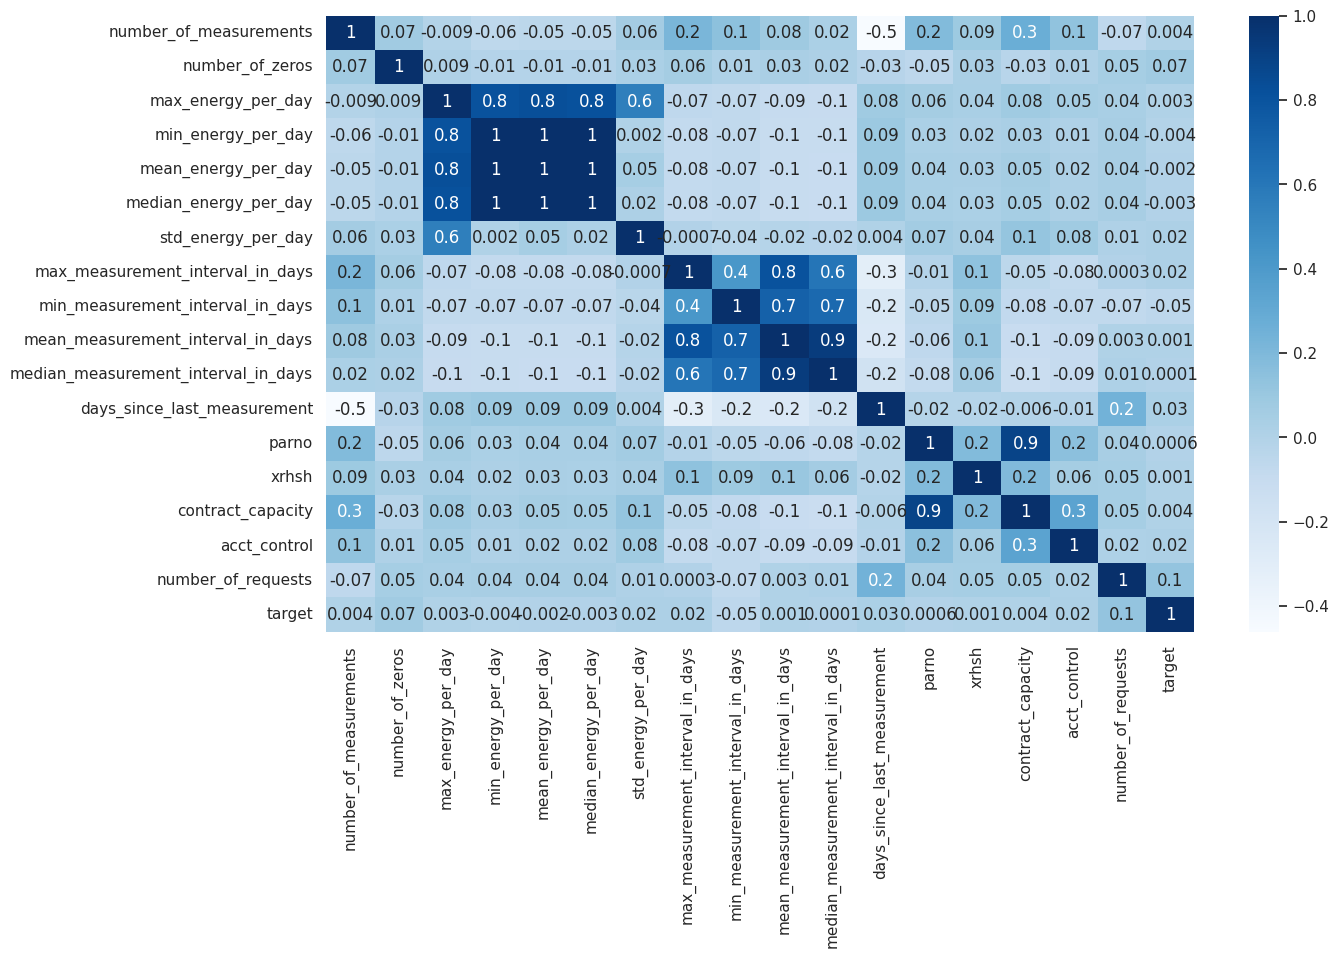

In [20]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

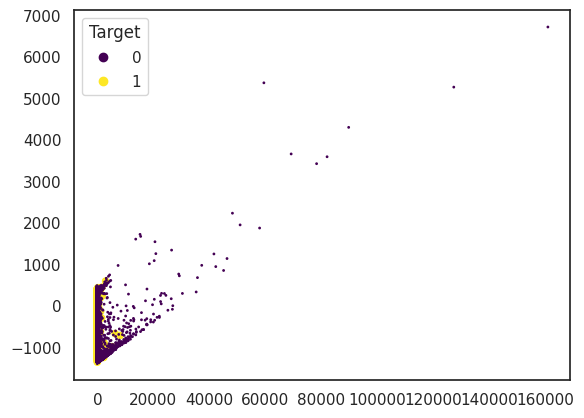

In [33]:
X = df.drop('target', axis=1)
y = df['target']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots()
s = np.where(y == 1, 20, 1)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=s, cmap='viridis')
ax.legend(*scatter.legend_elements(), title='Target')
plt.show()

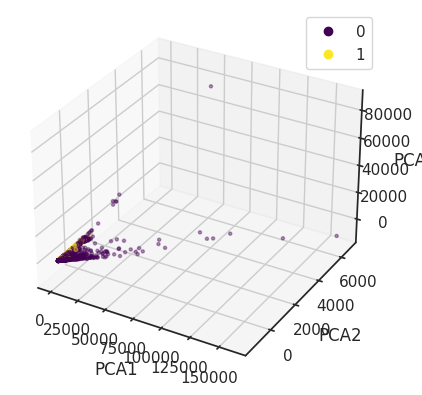

In [41]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s = np.where(y == 1, 8, 5)

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='viridis', s=s, alpha=0.4)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*scatter.legend_elements())
plt.show()

In [42]:
#df.drop(['xrhsh', 'parno', 'acct_control', 'contract_capacity', 'min_measurement_interval_in_days', 'max_energy_per_day'], axis=1, inplace=True)
print("Bincount of y:", df['target'].value_counts())
"""plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')"""

Bincount of y: 0    100518
1      1555
Name: target, dtype: int64


'plt.figure(figsize=(14,8))\nsns.set_theme(style="white")\ncorr = df.corr()\nheatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt=\'.1g\')'

In [43]:
df.head()

,number_of_measurements,number_of_zeros,max_energy_per_day,min_energy_per_day,mean_energy_per_day,median_energy_per_day,std_energy_per_day,max_measurement_interval_in_days,min_measurement_interval_in_days,mean_measurement_interval_in_days,median_measurement_interval_in_days,days_since_last_measurement,parno,xrhsh,contract_capacity,acct_control,number_of_requests,target
0,12,2,18.950000,0.000000,6.735356,7.049180,4.964937,350,15,144.181818,122.0,152,0,1,12.0,0,0,1
1,13,2,12.071429,0.000000,7.221644,10.070525,4.807979,243,6,122.416667,121.0,341,0,1,12.0,0,1,1
2,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,125,120,122.250000,122.0,1251,2,1,25.0,0,3,1
3,6,1,9.434066,4.546448,5.873035,4.989218,1.803735,371,68,197.200000,182.0,190,2,6,25.0,0,0,1
4,8,0,19.565574,1.910569,10.585130,10.008197,5.580233,246,121,139.142857,121.0,821,3,1,35.0,0,5,1


In [44]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']

In [45]:
import sys
import os

from pathlib import Path

parent = Path(os.path.abspath("")).resolve().parents[0]
if parent not in sys.path:
    sys.path.insert(0, str(parent))


from types import SimpleNamespace

import torch

from torch.utils.data import DataLoader

from models.mlp import MLP
from utils.data_utils import TorchDataset

from utils.metrics import get_classification_metrics, get_probability_measures, get_lift_demotion_scores

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [46]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
scaler = MinMaxScaler()

In [50]:
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
cat_clf = CatBoostClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
clfs = {'RandomForest': rf_clf,
       'CatBoost': cat_clf, 'MLP': None}

In [51]:
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if clf_name == "CatBoost":
            clf.fit(X_train, y_train, verbose=False)
            
        elif clf_name == "MLP":
            train_dataset = TorchDataset(X=torch.tensor(X_train).float(), y=torch.tensor(y_train.to_numpy()).float())  # reconstruction
            test_dataset = TorchDataset(X=torch.tensor(X_test).float(), y=torch.tensor(y_test.to_numpy()).float())

            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
            clf = MLP(in_size=X_train.shape[1], layer_units=[16, 32, 64], out_size=1, vae=False)
            optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
            criterion = torch.nn.BCEWithLogitsLoss()
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            args = dict(model=clf, train_loader=train_loader, test_loader=test_loader,
            epochs=100, optimizer=optimizer, criterion=criterion,
            reconstruction=False, vae=False, device=device, verbose=False, return_best=True)
            args = SimpleNamespace(**args)
            clf = clf.fit(args)
            
        else:
            clf.fit(X_train, y_train)

        if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
        else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
        acc_scores.append(acc)
        prec_scores.append(precision)
        rec_scores.append(recall)
        f1_scores.append(f1)
        
        brier_scores.append(brier)
        auc_roc_scores.append(roc_auc)
        pr_auc_scores.append(pr_auc)
        
        lift_scores.append(lift)
        demotion_scores.append(demotion)
        weighted_scores.append(weighted_score)
        
        print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

    print("Average - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}\n"
          .format(sum(acc_scores)/len(acc_scores), sum(prec_scores)/len(prec_scores),
                  sum(rec_scores)/len(rec_scores), sum(f1_scores)/len(f1_scores),
                 sum(brier_scores)/len(brier_scores), sum(auc_roc_scores)/len(auc_roc_scores), sum(pr_auc_scores)/len(pr_auc_scores),
                 sum(lift_scores)/len(lift_scores), sum(demotion_scores)/len(demotion_scores), sum(weighted_scores)/len(weighted_scores)))


Classifier: RandomForest
Fold 1 - Accuracy: 0.9847, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Brier: 0.0143, AUC-ROC: 0.8332, PR-AUC: 0.1147, Lift: 0.3871, Demotion: 1.0000, Weighted: 0.5710
Fold 2 - Accuracy: 0.9850, Precision: 0.8333, Recall: 0.0161, F1: 0.0315, Brier: 0.0144, AUC-ROC: 0.8142, PR-AUC: 0.1094, Lift: 0.2903, Demotion: 1.0000, Weighted: 0.5032
Fold 3 - Accuracy: 0.9845, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Brier: 0.0147, AUC-ROC: 0.8121, PR-AUC: 0.0823, Lift: 0.1613, Demotion: 1.0000, Weighted: 0.4129
Fold 4 - Accuracy: 0.9847, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Brier: 0.0143, AUC-ROC: 0.8153, PR-AUC: 0.1130, Lift: 0.3226, Demotion: 1.0000, Weighted: 0.5258
Fold 5 - Accuracy: 0.9846, Precision: 0.2857, Recall: 0.0064, F1: 0.0126, Brier: 0.0143, AUC-ROC: 0.8281, PR-AUC: 0.1074, Lift: 0.2258, Demotion: 1.0000, Weighted: 0.4581
Average - Accuracy: 0.9847, Precision: 0.2238, Recall: 0.0045, F1: 0.0088, Brier: 0.0144, AUC-ROC: 0.8206, PR-AUC: 0.105

KeyboardInterrupt: 

In [54]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from scipy.special import expit

df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]
df_class_0_train, df_class_0_test = train_test_split(
    df_class_0, test_size=0.2, shuffle=True
)

df_train = pd.concat([df_class_0_train, df_class_1],
                     ignore_index=True)
df_test = pd.concat([df_class_0_test, df_class_1], 
                    ignore_index=True)

# leave out class 1 data from training
df_train = df_train[df_train['target'] == 0]

# fit isolation forest model on training data
model = IsolationForest(contamination='auto')

model.fit(df_train.drop(['target'], axis=1))

# predict anomaly scores for test data
scores = model.score_samples(df_test.drop(['target'], axis=1))

# convert scores to binary predictions
#y_pred_test = np.where(scores >= np.quantile(scores, 0.05), 0, 1)
#print("Quantile:", np.quantile(scores, 0.05))
y_pred_test = np.where(scores >= 0, 0, 1)
probs = expit(-scores)

acc, precision, recall, f1 = get_classification_metrics(df_test['target'], y_pred_test)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}"
              )

brier, roc_auc, pr_auc = get_probability_measures(df_test['target'], probs)
lift, demotion, weighted_score = get_lift_demotion_scores(df_test['target'].values, probs,
                                                                      num_samples=int(0.1 * len(df_class_1)))

print(f"brier: {brier:.4f}, roc-auc: {roc_auc:.4f}, pr-auc: {pr_auc:.4f}"
              )
print(f"lift: {lift:.4f}, demotion: {demotion:.4f}, weighted: {weighted_score:.4f}"
              )


Accuracy: 0.0718, Precision: 0.0718, Recall: 1.0000, F1: 0.1340
brier: 0.3415, roc-auc: 0.6958, pr-auc: 0.1243
lift: 0.1161, demotion: 0.9935, weighted: 0.3794


In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [63]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, 
                                                    random_state=42, stratify=y)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [69]:
print("Bincount of y:", np.bincount(y_smote.values))
print("Bincount of y:", np.bincount(y_test.values))

Bincount of y: [78403 78403]
Bincount of y: [22115   342]


In [71]:
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)
        
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        

    if clf_name == "CatBoost":
        clf.fit(X_train, y_train, verbose=False)
            
    elif clf_name == "MLP":
            train_dataset = TorchDataset(X=torch.tensor(X_train).float(), y=torch.tensor(y_train.to_numpy()).float())  # reconstruction
            test_dataset = TorchDataset(X=torch.tensor(X_test).float(), y=torch.tensor(y_test.to_numpy()).float())

            train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)
            clf = MLP(in_size=X_train.shape[1], layer_units=[16, 32, 64], out_size=1, vae=False)
            optimizer = torch.optim.Adam(clf.parameters(), lr=1e-3)
            criterion = torch.nn.BCEWithLogitsLoss()
            device = 'cuda' if torch.cuda.is_available() else 'cpu'
            args = dict(model=clf, train_loader=train_loader, test_loader=test_loader,
            epochs=100, optimizer=optimizer, criterion=criterion,
            reconstruction=False, vae=False, device=device, verbose=False, return_best=True)
            args = SimpleNamespace(**args)
            clf = clf.fit(args)
            
    else:
            clf.fit(X_train, y_train)

    if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
    else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
    acc_scores.append(acc)
    prec_scores.append(precision)
    rec_scores.append(recall)
    f1_scores.append(f1)
        
    brier_scores.append(brier)
    auc_roc_scores.append(roc_auc)
    pr_auc_scores.append(pr_auc)
        
    lift_scores.append(lift)
    demotion_scores.append(demotion)
    weighted_scores.append(weighted_score)
        
    print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

Classifier: RandomForest
Fold 1 - Accuracy: 0.9846, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Brier: 0.0144, AUC-ROC: 0.8241, PR-AUC: 0.1026, Lift: 0.0882, Demotion: 1.0000, Weighted: 0.3618
Classifier: CatBoost
Fold 1 - Accuracy: 0.9842, Precision: 0.2000, Recall: 0.0117, F1: 0.0221, Brier: 0.0143, AUC-ROC: 0.8658, PR-AUC: 0.1197, Lift: 0.2059, Demotion: 1.0000, Weighted: 0.4441
Classifier: MLP
Best loss (0.0061) found on epoch 74
Fold 1 - Accuracy: 0.9848, Precision: 0.5000, Recall: 0.0029, F1: 0.0058, Brier: 0.0143, AUC-ROC: 0.8567, PR-AUC: 0.1084, Lift: 0.1471, Demotion: 1.0000, Weighted: 0.4029
Average - Accuracy: 0.9848, Precision: 0.5000, Recall: 0.0029, F1: 0.0058, Brier: 0.0143, AUC-ROC: 0.8567, PR-AUC: 0.1084, Lift: 0.1471, Demotion: 1.0000, Weighted: 0.4029



In [72]:
from sklearn.utils.class_weight import compute_class_weight

In [74]:
# define X and y
X = df.drop('target', axis=1)
y = df['target']
rf_clf = RandomForestClassifier(random_state=42)
cat_clf = CatBoostClassifier(random_state=42)
clfs = {'RandomForest': None,
       'CatBoost': None}
for clf_name, clf in clfs.items():
    # Initialize the evaluation metrics lists
    acc_scores = []
    prec_scores = []
    rec_scores = []
    f1_scores = []
    brier_scores, auc_roc_scores, pr_auc_scores = [], [], []
    lift_scores, demotion_scores, weighted_scores = [], [], []
    

    print("Classifier:", clf_name)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        classes = np.unique(y_train)
        weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
        class_weights = dict(zip(classes, weights))
        print("Class weights:", class_weights)
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        

        if clf_name == "CatBoost":
            clf = CatBoostClassifier(random_state=42, class_weights=class_weights)
            clf.fit(X_train, y_train, verbose=False)
            
        elif clf_name == "MLP":
            continue
            
        else:
            clf = RandomForestClassifier(random_state=42,class_weight=class_weights)
            clf.fit(X_train, y_train)

        if clf_name != "MLP":
            y_pred = clf.predict(X_test)

            acc, precision, recall, f1 = get_classification_metrics(y_test.values, y_pred)
            
            y_scores = clf.predict_proba(X_test)
            idx = np.argmax(y_scores, axis=1)
            y_scores = np.where(idx == 0, 1 - y_scores[:, 0], y_scores[:, 1])


            brier, roc_auc, pr_auc = get_probability_measures(y_test.values, y_scores)

            num_ones = np.sum(y_test == 1)
            lift, demotion, weighted_score = get_lift_demotion_scores(y_test.values, y_scores,
                                                                      num_samples=int(0.1 * num_ones))
        else:
            args = dict(
                model=clf,
                data_loader=test_loader, criterion=criterion,
            reconstruction=False, vae=False, device=device)
            args = SimpleNamespace(**args)
            _, acc, precision, recall, f1, brier, roc_auc, pr_auc, lift, demotion, weighted_score = clf.predict(
                args
            )
        
        acc_scores.append(acc)
        prec_scores.append(precision)
        rec_scores.append(recall)
        f1_scores.append(f1)
        
        brier_scores.append(brier)
        auc_roc_scores.append(roc_auc)
        pr_auc_scores.append(pr_auc)
        
        lift_scores.append(lift)
        demotion_scores.append(demotion)
        weighted_scores.append(weighted_score)
        
        print("Fold {} - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}"
              .format(len(acc_scores), acc_scores[-1], prec_scores[-1], rec_scores[-1], f1_scores[-1],
                     brier_scores[-1], auc_roc_scores[-1], pr_auc_scores[-1],
                     lift_scores[-1], demotion_scores[-1], weighted_scores[-1]))

    print("Average - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}, Brier: {:.4f}, AUC-ROC: {:.4f}, PR-AUC: {:.4f}, Lift: {:.4f}, Demotion: {:.4f}, Weighted: {:.4f}\n"
          .format(sum(acc_scores)/len(acc_scores), sum(prec_scores)/len(prec_scores),
                  sum(rec_scores)/len(rec_scores), sum(f1_scores)/len(f1_scores),
                 sum(brier_scores)/len(brier_scores), sum(auc_roc_scores)/len(auc_roc_scores), sum(pr_auc_scores)/len(pr_auc_scores),
                 sum(lift_scores)/len(lift_scores), sum(demotion_scores)/len(demotion_scores), sum(weighted_scores)/len(weighted_scores)))


Classifier: RandomForest
Class weights: {0: 0.5077349715223717, 1: 32.82073954983923}
Fold 1 - Accuracy: 0.9848, Precision: 1.0000, Recall: 0.0032, F1: 0.0064, Brier: 0.0143, AUC-ROC: 0.8129, PR-AUC: 0.0989, Lift: 0.2581, Demotion: 1.0000, Weighted: 0.4806
Class weights: {0: 0.5077349715223717, 1: 32.82073954983923}
Fold 2 - Accuracy: 0.9848, Precision: 0.5000, Recall: 0.0032, F1: 0.0064, Brier: 0.0143, AUC-ROC: 0.8160, PR-AUC: 0.1066, Lift: 0.3226, Demotion: 1.0000, Weighted: 0.5258
Class weights: {0: 0.5077349715223717, 1: 32.82073954983923}
Fold 3 - Accuracy: 0.9847, Precision: 0.0000, Recall: 0.0000, F1: 0.0000, Brier: 0.0147, AUC-ROC: 0.7844, PR-AUC: 0.0715, Lift: 0.1613, Demotion: 0.9677, Weighted: 0.4032
Class weights: {0: 0.5077348753342038, 1: 32.82114147909968}
Fold 4 - Accuracy: 0.9848, Precision: 0.5000, Recall: 0.0032, F1: 0.0064, Brier: 0.0143, AUC-ROC: 0.7922, PR-AUC: 0.1024, Lift: 0.3871, Demotion: 1.0000, Weighted: 0.5710
Class weights: {0: 0.5077348753342038, 1: 32.82